<a href="https://colab.research.google.com/github/Muntasir2179/tensorflow-learning/blob/classification-NN-modeling/02_neural_network_classification_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to neural network classification with TensorFlow

In this notebook we're going to learn how to write neural networks for classification problems. A classification is where you try to classify something as one thing or another.

A few types of classification problem:
*  Binary Classification.
*  Multiclass Classification.
*  Multilabel Classification.

## Creating data to view and fit

In [1]:
from sklearn.datasets import make_circles

# make 1000 examples
n_samples = 1000

# create circles
x, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [2]:
x.shape

(1000, 2)

In [3]:
x[:10,:]

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       [-0.39373073,  0.69288277],
       [ 0.44220765, -0.89672343],
       [-0.47964637,  0.67643477],
       [-0.01364836,  0.80334872],
       [ 0.77151327,  0.14775959],
       [-0.16932234, -0.79345575],
       [-0.1214858 ,  1.02150905]])

In [4]:
y.shape

(1000,)

In [5]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

## Visualizing the data

In [6]:
import pandas as pd
circles = pd.DataFrame({'X0': x[:, 0], 'X1': x[:, 1], 'label': y})
circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


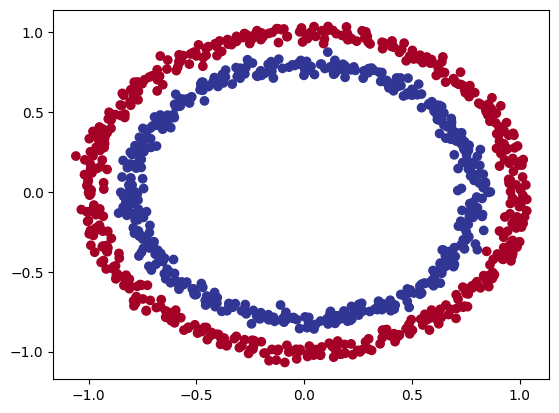

In [7]:
# visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.RdYlBu)

📖Exercise for understanding the **hyperparameter** tuning
[playground.tensorflow.org](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.55711&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)

## Getting data ready

In [8]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [9]:
x_train.shape, y_train.shape

((800, 2), (800,))

In [10]:
x_test.shape, y_test.shape

((200, 2), (200,))

## Building model to train

In [11]:
import tensorflow as tf

### Testing with model_1

In [12]:
# set the seed
tf.random.set_seed(42)

# creating model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# compile the model
model_1.compile(loss=tf.losses.BinaryCrossentropy(),
              optimizer=tf.optimizers.Adam(learning_rate=0.03),
              metrics=['accuracy'])

# fit the model
model_1.fit(x, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 3ms/step - loss: 2.3985 - accuracy: 0.4800
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7011 - accuracy: 0.5400
Epoch 3/5
32/32 [==============================] - 0s 3ms/step - loss: 0.6949 - accuracy: 0.4760
Epoch 4/5
32/32 [==============================] - 0s 11ms/step - loss: 0.6970 - accuracy: 0.5060
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6971 - accuracy: 0.4720


In [13]:
model_1.evaluate(x, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.4820


[0.693526029586792, 0.4819999933242798]

### Testing with model_2

In [14]:
# set the seed
tf.random.set_seed(42)

# creating model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# compile the model
model_2.compile(loss=tf.losses.BinaryCrossentropy(),
              optimizer=tf.optimizers.Adam(learning_rate=0.03),
              metrics=['accuracy'])

# fit the model
model_2.fit(x, y, epochs=100, verbose=0)

In [15]:
model_2.evaluate(x, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6940 - accuracy: 0.5000


[0.6939822435379028, 0.5]

### Testing with model_3

In [16]:
# set the random seed
tf.random.set_seed(42)

# create the model (this time 3 layers)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# compile the model
model_3.compile(loss=tf.losses.BinaryCrossentropy(),
                optimizer=tf.optimizers.Adam(learning_rate=0.03),
                metrics=['accuracy'])

# fit the model
model_3.fit(x, y, epochs=100, verbose=0)

In [17]:
model_3.evaluate(x, y)

32/32 [==============================] - 0s 2ms/step - loss: 7.6246 - accuracy: 0.5000


[7.6246185302734375, 0.5]

**🧮Conclution of testing models:** It looks like our model is not learning enough to make good predictions. No matter what regularization we do it ends up with accuracy of 50%. Which is basically guessing.

So, what should be done further to resolve this issue.....

We need to visualize our data again in another perspective which may give us the notion of whats been wrong in our modeling.

### Visualizing the predictions

In [18]:
model_3.predict(x)[:10]

32/32 [==============================] - 0s 1ms/step


array([[48.039425],
       [93.41794 ],
       [94.69816 ],
       [71.26446 ],
       [81.464935],
       [74.10518 ],
       [57.881893],
       [49.350666],
       [96.91935 ],
       [56.28273 ]], dtype=float32)

In [19]:
# we will be using numpy.meshgrid()
# here is a short example of using meshgrid()
import numpy as np

na, nb = (5, 2)
a = np.linspace(0, 1, na)
b = np.linspace(0, 1, nb)
av, bv = np.meshgrid(a, b)
av, bv

(array([[0.  , 0.25, 0.5 , 0.75, 1.  ],
        [0.  , 0.25, 0.5 , 0.75, 1.  ]]),
 array([[0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 1.]]))

In [20]:
np.linspace(0, 1, 5), np.linspace(0, 1, 2)

(array([0.  , 0.25, 0.5 , 0.75, 1.  ]), array([0., 1.]))

In [21]:
def plot_decision_boundary(model, x, y):
  '''
  Plots the decision boundary created by a model predicting on x.
  '''
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = x[:, 0].min() - 0.1, x[:, 0].max() + 0.1
  y_min, y_max = x[:, 1].min() - 0.1, x[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

  # create x value (we are going to make predictions on these)
  x_in = np.c_[xx.ravel(), yy.ravel()]  # stack 2D arrays together

  # make predictions
  y_pred = model.predict(x_in)

  # check for multiclass
  if len(y_pred[0]) > 1:
    print('doing multiclass classification')
    # we have to reshape our prediction to get then ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print('binary classification')
    y_pred = np.round(y_pred).reshape(xx.shape)

  # plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(x[:, 0], x[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 0s 1ms/step
binary classification


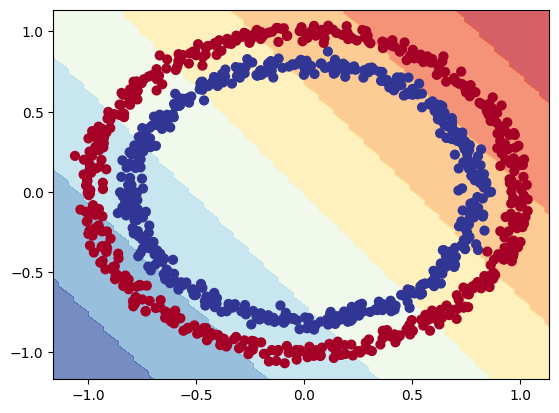

In [22]:
plot_decision_boundary(model=model_3, x=x, y=y)

**🧮Note:** It looks like the model is trying to draw a straight line to classify red and blue dots. But the data is aranged in a circular shape. That's why it not possible to saperate this kind of data with a regression line.

**🔑What is a regression problem?**

📖Regression is a statistical method used in finance, investing, and other disciplines that attempts to determine the strength and character of the relationship between one dependent variable (usually denoted by Y) and a series of other variables (known as independent variables).
[Regression Problem](https://www.investopedia.com/terms/r/regression.asp)

### Checking if our model works on Regeression data

In [23]:
# set the random seed
tf.random.set_seed(42)

# creating some regression data
x_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5)   # y = x + 100

# reshaping x_regression to pass into the model
x_regression = tf.reshape(x_regression, shape=(200,1))

# spliting our regression data into training and test sets
x_reg_train = x_regression[:150]
x_reg_test = x_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

**🔑NOTE:** model_3 is designed for Binary Classification. But, now we are dealing with regression problem. So, we need to change the loss function to MAE or MSE.

In [24]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_4.compile(loss=tf.losses.mae,
              optimizer=tf.optimizers.Adam(),
              metrics=['mae'])

model_4.fit(x_reg_train, y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 5ms/step - loss: 284.1562 - mae: 284.1562
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 172.5842 - mae: 172.5842
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 68.8227 - mae: 68.8227
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 65.1635 - mae: 65.1635
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 74.1983 - mae: 74.1983
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 51.2169 - mae: 51.2169
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 44.9697 - mae: 44.9697
Epoch 8/100
5/5 [==============================] - 0s 5ms/step - loss: 43.9470 - mae: 43.9470
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 43.4882 - mae: 43.4882
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 43.0029 - mae: 43.0029
Epoch 11/100
5/5 [==============================] - 0s 

2/2 [==============================] - 0s 4ms/step


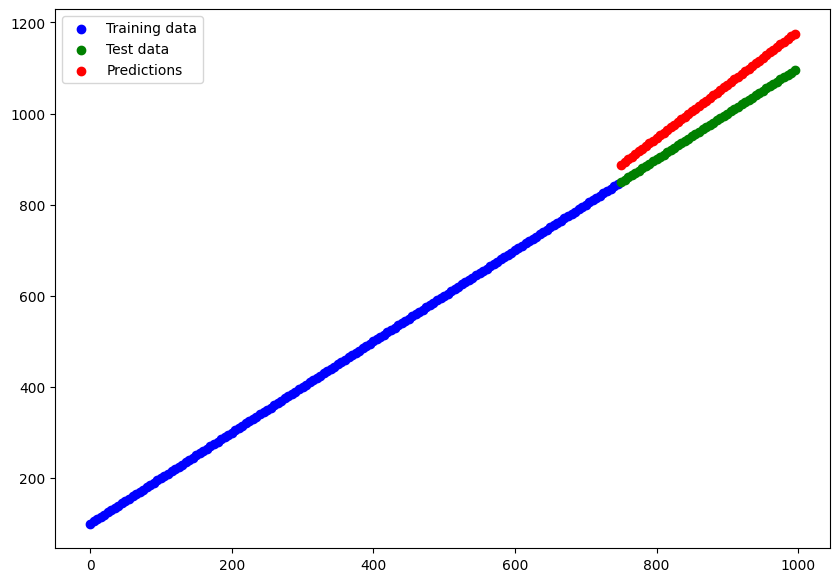

In [25]:
# make prediction with our trained model
y_reg_preds = model_4.predict(x_reg_test)

# plot the model's predictions against our regression data
plt.figure(figsize=(10,7))
plt.scatter(x_reg_train, y_reg_train, c='b', label='Training data')
plt.scatter(x_reg_test, y_reg_test, c='g', label='Test data')
plt.scatter(x_reg_test, y_reg_preds, c='r', label='Predictions')
plt.legend()

**🧮NOTE:** It looks like our model was trying to classify the classes by drawing a regression line but we have a circular shape of data, which is in a nonlinear shape. So it is not possible to classify this kind of data with regression line.

### Trying to solve non-linearity

In [26]:
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_5.compile(loss=tf.losses.BinaryCrossentropy(),
                optimizer=tf.optimizers.Adam(learning_rate=0.03),
                metrics=['accuracy'])

model_5.fit(x, y, epochs=50, callbacks=tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=5, restore_best_weights=True))

Epoch 1/50
32/32 [==============================] - 1s 3ms/step - loss: 0.6952 - accuracy: 0.5080
Epoch 2/50
32/32 [==============================] - 0s 3ms/step - loss: 0.6854 - accuracy: 0.5190
Epoch 3/50
32/32 [==============================] - 0s 3ms/step - loss: 0.6757 - accuracy: 0.5640
Epoch 4/50
32/32 [==============================] - 0s 3ms/step - loss: 0.6355 - accuracy: 0.6300
Epoch 5/50
32/32 [==============================] - 0s 4ms/step - loss: 0.5906 - accuracy: 0.6880
Epoch 6/50
32/32 [==============================] - 0s 5ms/step - loss: 0.5257 - accuracy: 0.7400
Epoch 7/50
32/32 [==============================] - 0s 5ms/step - loss: 0.4771 - accuracy: 0.7790
Epoch 8/50
32/32 [==============================] - 0s 5ms/step - loss: 0.4436 - accuracy: 0.8050
Epoch 9/50
32/32 [==============================] - 0s 6ms/step - loss: 0.4460 - accuracy: 0.8020
Epoch 10/50
32/32 [==============================] - 0s 5ms/step - loss: 0.4200 - accuracy: 0.8150
Epoch 11/50
32/32 [

In [27]:
test_accuracy = model_5.evaluate(x, y, verbose=0)
print(test_accuracy[1])

0.9570000171661377


313/313 [==============================] - 0s 1ms/step
binary classification


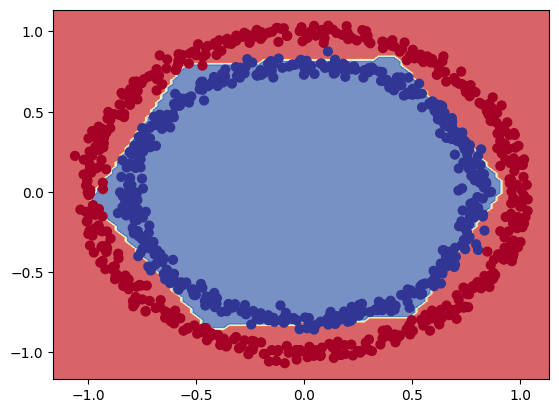

In [28]:
plot_decision_boundary(model=model_5, x=x, y=y)

🤔**Question:** What's wrong with the prediction we've made? Are we really evaluating our model correctly? Hint: What data did the model learn on and what data did we predict on?

🔑**Note:** The combination of **linear (straight lines) and non-linear (non-straight lines) functions** is one of the key fundamentals of neural networks.